In [174]:
'''
Author: Noah Ponto
This file contains the logic to convert the exr image files to png, then display
the png file alongside textual predicates for human confirmation 
'''

'\nThis file contains the logic to convert the exr image files to png, then display\nthe png file alongside textual predicates for human confirmation \n'

In [1]:
'''
This is the variable to change to run the code for a different scene
'''

SCENE_NAME_BASE = "CLEVR_new_%06d"
SCENE_INDEXES = range(2)

'''
Converts exr files into png files so they can be more easily viewed and included
in this document
'''
import numpy as np
import os
import cv2

def exr_to_png(exr_file, png_file=None, png_folder="png", lighten_factor=0):
    '''
    Takes the path to an exr file and saves a new file as a png
    '''
    if not os.path.isfile(exr_file):
        print(f"file doesn't exist: {exr_file}")
        return None

    filename, extension = os.path.splitext(exr_file)
    if not extension.lower().endswith('.exr'):
        print(f"file of wrong type: {exr_file}")
        return None
    if (png_file is None):
        directory = os.path.dirname(exr_file)
        directory = os.path.join(directory, png_folder)
        if not os.path.isdir(directory):
            print(f"made directory {directory}")
            os.makedirs(directory)
        basename = os.path.basename(filename)
        png_file = os.path.join(directory, basename+".png")
    if os.path.isfile(png_file):
        print(f"file already exists: {png_file}")
        return png_file

    #cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH
    im=cv2.imread(exr_file, -1)
    
    im=im*65535+lighten_factor
    im[im>65535]=65535
    
    im=np.uint16(im)
    if cv2.imwrite(png_file, im):
        print(f"saved {png_file}")
    else:
        print(f"ERROR saving {png_file}")
    return png_file

path = "../output/images/"

possible_cameras = ["camera_ori", "camera_top", "camera1", "camera2"]
png_files = []
for scn_idx in SCENE_INDEXES:
    scn_name = SCENE_NAME_BASE % scn_idx
    for cam in possible_cameras:
        file = path+scn_name+cam+".exr"
        png_file: str = exr_to_png(file, lighten_factor=16000)
        if png_file is not None: png_files.append(png_file)

file already exists: ../output/images\png\CLEVR_new_000000camera_ori.png
file doesn't exist: ../output/images/CLEVR_new_000000camera_top.exr
file doesn't exist: ../output/images/CLEVR_new_000000camera1.exr
file doesn't exist: ../output/images/CLEVR_new_000000camera2.exr
file already exists: ../output/images\png\CLEVR_new_000001camera_ori.png
file doesn't exist: ../output/images/CLEVR_new_000001camera_top.exr
file doesn't exist: ../output/images/CLEVR_new_000001camera1.exr
file doesn't exist: ../output/images/CLEVR_new_000001camera2.exr
file already exists: ../output/images\png\CLEVR_new_000002camera_ori.png
file doesn't exist: ../output/images/CLEVR_new_000002camera_top.exr
file doesn't exist: ../output/images/CLEVR_new_000002camera1.exr
file doesn't exist: ../output/images/CLEVR_new_000002camera2.exr
saved ../output/images\png\CLEVR_new_000003camera_ori.png
file doesn't exist: ../output/images/CLEVR_new_000003camera_top.exr
file doesn't exist: ../output/images/CLEVR_new_000003camera1.

../output/images\png\CLEVR_new_000001camera_ori.png


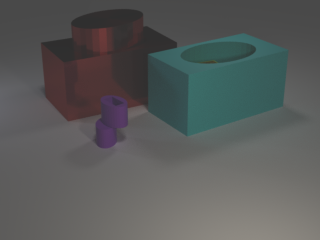

../output/images\png\CLEVR_new_000001camera_top.png


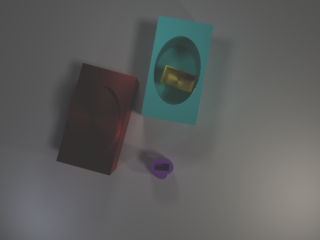

../output/images\png\CLEVR_new_000001camera1.png


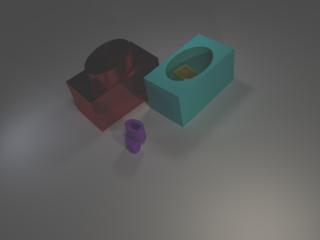

../output/images\png\CLEVR_new_000001camera2.png


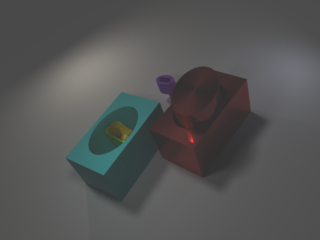

In [177]:
'''
Displays each of the png files from the previous block
'''
from IPython.display import Image, display
for pf in png_files:
    print(pf)
    display(Image(filename=pf))

In [178]:
'''
Opens the scene ground truth json file
'''
import json
import os

ground_truth_directory = '../output/scenes/'
with open(ground_truth_directory+SCENE_NAME+'.json') as f:
    data = json.load(f)

Scene CLEVR_new_000001 contains objects:


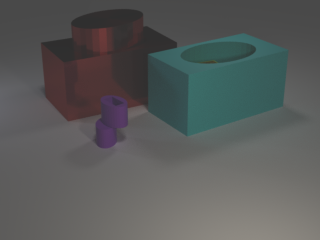

Objects:

0. cyan rubber large rectangle cylinder-container

1. red metal large rectangle cylinder-container

2. red metal large long cylinder

3. yellow metal small rectangle container

4. purple rubber small long cylinder

5. purple rubber small ellipse rectangle-container


In [179]:
'''
List the objects in the scene
'''
print(f"Scene {SCENE_NAME} contains objects:")
display(Image(png_files[0]))

# Make list of textual descriptions of the color, material, and shape of each object
descriptions = []

# Dictionary mapping the shape names to more easily readable English names
shape_to_name = {
        "cube_01": "cube",
        "cube_01_small": "small cube",
        "cube_01_large": "large cube",
        "cylinder_01_small": "small cylinder",
        "cylinder_01": "medium cylinder",
        "cylinder_01_large": "large cylinder",
        "cube_container_01_small": "small cube container",
        "cube_container_01": "cube container",
        "cube_container_01_large": "large cube container",
        "cube_cylinder_01_small": "small cube cylinder",
        "cube_cylinder_01": "cube cylinder",
        "cube_cylinder_01_large": "large cube cylinder",
        "long_cylinder_01_small": "small long cylinder",
        "long_cylinder_01": "long cylinder",
        "long_cylinder_01_large": "large long cylinder",
        "rectangle_01_small": "small rectangle",
        "rectangle_01": "rectangle",
        "rectangle_01_large": "large rectangle",
        "rectangle_cont_01_small": "small rectangle container",
        "rectangle_cont_01": "rectangle container",
        "rectangle_cont_01_large": "large rectangle container",
        "rectangle_cylinder_01_small": "small rectangle cylinder-container",
        "rectangle_cylinder_01": "rectangle cylinder-container",
        "rectangle_cylinder_01_large": "large rectangle cylinder-container",
        "short_cylinder_01_small": "short cylinder",
        "short_cylinder_01": "short cylinder",
        "short_cylinder_01_large": "large short cylinder",
        "cylinder_container_01_small": "small cylinder container",
        "cylinder_container_01": "cylinder container",
        "cylinder_container_01_large": "large cylinder container",
        "cylinder_rect_cont_01_small": "small cylinder rectangle container",
        "cylinder_rect_cont_01": "cylinder rectangle container",
        "cylinder_rect_cont_01_large": "large cylinder rectangle container",
        "ellipse_container_01_small": "small ellipse container",
        "ellipse_container_01": "ellipse container",
        "ellipse_container_01_large": "large ellipse container",
        "ellipse_rect_cont_01_small": "small ellipse rectangle-container",
        "ellipse_rect_cont_01": "ellipse rectangle-container",
        "ellipse_rect_cont_01_large": "large ellipse rectangle-container",
        "thin_rectangle_01_small": "small thin rectangle",
        "thin_rectangle_01": "thin rectangle",
        "thin_rectangle_01_large": "large thin rectangle"
    }

def describe_obj(obj: dict) -> str:
    '''
    Takes the JSON object dictionary and returns a string description of the
    object
    '''
    return f"{obj['color']} {obj['material']} {shape_to_name[obj['shape']]}"

print("Objects:")
for idx, obj in enumerate(data['objects']):
    descript: str = describe_obj(obj)
    descriptions.append(descript)
    print(f"\n{idx}. {descript}")

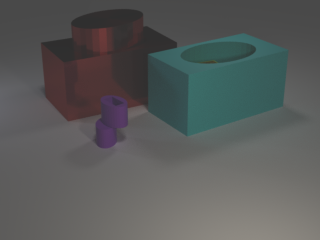

"Right" relation:

0. nothing is right of cyan rubber large rectangle cylinder-container

1. 4 objects right of red metal large rectangle cylinder-container:
	- cyan rubber large rectangle cylinder-container
	- yellow metal small rectangle container
	- purple rubber small long cylinder
	- purple rubber small ellipse rectangle-container

2. 4 objects right of red metal large long cylinder:
	- cyan rubber large rectangle cylinder-container
	- yellow metal small rectangle container
	- purple rubber small long cylinder
	- purple rubber small ellipse rectangle-container

3. 1 objects right of yellow metal small rectangle container:
	- cyan rubber large rectangle cylinder-container

4. 3 objects right of purple rubber small long cylinder:
	- cyan rubber large rectangle cylinder-container
	- yellow metal small rectangle container
	- purple rubber small ellipse rectangle-container

5. 2 objects right of purple rubber small ellipse rectangle-container:
	- cyan rubber large rectangle cylinder-co

In [180]:
'''
List relationships

Uses the descriptions list from above, which contains textual descriptions of 
the color, material, and object
'''
def print_directional_relationship_info(relationship: str):
    '''
    Takes a relationship ('behind', 'left', 'front', 'right') and prints all
    the information for that relationship
    e.x. If called with 'right', for each object will print all the objects
    to it's right 
    '''
    rel_list = data['relationships'][relationship]
    # For each object in the relationship list
    for first_obj_idx, other_objs_idxs in enumerate(rel_list):
        first_obj_str = descriptions[first_obj_idx]
        output:str = f"\n{first_obj_idx}. "
        if (len(other_objs_idxs) < 1):
            # If no other objects in relationship
            output += f"nothing is {relationship} of {first_obj_str}"
        else:
            # Iterate and print other objects in relationship
            # ex: "5 objects right of cyan metal cube_01:"
            output += f"{len(other_objs_idxs)} objects {relationship} of {first_obj_str}:"
            for other_obj_idx in other_objs_idxs:
                other_obj_str = descriptions[other_obj_idx]
                output += f"\n\t- {other_obj_str}"
        print(output)

'''
List relationships
'''
display(Image(png_files[0]))

relationships = list(data['relationships'].keys())
# Print all relationship info
# for rel in relationships:
#     print_relationship_info(rel)
#     print()

# List specific relationship
RELATIONSHIP = "right"  # change this to print different relationships
print("\"Right\" relation:")
print_directional_relationship_info(RELATIONSHIP)    


In [181]:
print("\"Behind\" relation:")
print_directional_relationship_info("behind")

"Behind" relation:

0. 2 objects behind of cyan rubber large rectangle cylinder-container:
	- red metal large rectangle cylinder-container
	- red metal large long cylinder

1. nothing is behind of red metal large rectangle cylinder-container

2. nothing is behind of red metal large long cylinder

3. 3 objects behind of yellow metal small rectangle container:
	- cyan rubber large rectangle cylinder-container
	- red metal large rectangle cylinder-container
	- red metal large long cylinder

4. 5 objects behind of purple rubber small long cylinder:
	- cyan rubber large rectangle cylinder-container
	- red metal large rectangle cylinder-container
	- red metal large long cylinder
	- yellow metal small rectangle container
	- purple rubber small ellipse rectangle-container

5. 4 objects behind of purple rubber small ellipse rectangle-container:
	- cyan rubber large rectangle cylinder-container
	- red metal large rectangle cylinder-container
	- red metal large long cylinder
	- yellow metal small

In [182]:
'''
Display existing supported and contained relationships
'''

used_to_rel = {
    "sup": "supports",
    "con": "contains"
}

def describe_physical_relationship(object: dict):
    '''
    Takes an object dictionary and prints a text output of the supported, contained,
    or independent relationship
    '''
    this_obj: str = describe_obj(obj)
    other_object: str = "no other object"
    relation: str = "no relation"

    # If supporter or container
    if obj['used'] in used_to_rel:
        other_object: str = describe_obj(obj['child'])
        relation = used_to_rel[obj["used"]]
    # If supportee or containee
    elif obj['used'] == "cld":
        # Find parent
        for search_obj in data['objects']:
            if search_obj['child'] == obj:
                other_object: str = describe_obj(search_obj)
                relation: str = "is supported by" if search_obj["used"] == "sup" else "is contained by"
                break
    # If independent
    else:
        relation = "is independent"
        other_object = ""
    return f"{this_obj} {relation} {other_object}"


# display(Image(png_files[0]))
print("\"Support\" and \"Contains\" relations:")
for idx, obj in enumerate(data['objects']):
    descript: str = describe_physical_relationship(obj)
    print(f"\n{idx}. {descript}")

"Support" and "Contains" relations:

0. cyan rubber large rectangle cylinder-container contains yellow metal small rectangle container

1. red metal large rectangle cylinder-container contains red metal large long cylinder

2. red metal large long cylinder is contained by red metal large rectangle cylinder-container

3. yellow metal small rectangle container is contained by cyan rubber large rectangle cylinder-container

4. purple rubber small long cylinder supports purple rubber small ellipse rectangle-container

5. purple rubber small ellipse rectangle-container is supported by purple rubber small long cylinder


In [183]:
'''
TO GET OPENEXR ON WINDOWS:
1. Go to this website https://www.lfd.uci.edu/~gohlke/pythonlibs/ and download the
wheel file cooresponding to your OS
(NOTE: I'm working on Windows10 with Python version 3.9 and the wheel file 
"OpenEXR-1.3.7-cp39-cp39-win_amd64.whl" worked for me.)
2. Navigate to the download location and run `pip install *.whl`
3. OpenEXR should be successfully installed
'''

import OpenEXR as exr
import numpy as np
import Imath
'''
Copied from depthRendering.ipynb
'''
def extract_rgb_depth(filename):
    exrfile = exr.InputFile(filename)
    header = exrfile.header()
    dw = header['dataWindow']
    isize = (dw.max.y - dw.min.y + 1, dw.max.x - dw.min.x + 1)
    channelData = dict()
    for c in header['channels']:
        C = exrfile.channel(c, Imath.PixelType(Imath.PixelType.FLOAT))
        C = np.frombuffer(C, dtype=np.float32)
        C = np.reshape(C, isize)
        
        channelData[c] = C
    depth = channelData['Z']
    colorChannels = ['R', 'G', 'B', 'A'] if 'A' in header['channels'] else ['R', 'G', 'B']
    img = np.concatenate([channelData[c][...,np.newaxis] for c in colorChannels], axis=2)

    # linear to standard RGB
    img[..., :3] = np.where(img[..., :3] <= 0.0031308,
                                12.92 * img[..., :3],
                                1.055 * np.power(img[..., :3], 1 / 2.4) - 0.055)

    # sanitize image to be in range [0, 1]
    img = np.where(img < 0.0, 0.0, np.where(img > 1.0, 1, img))
    
    return img, depth


# Extract the color and depth matrixes
color_mat, depth_mat = extract_rgb_depth(filepath)

Depth info:
min 11.094663619995117
max 28.540233612060547
mean 15.917630195617676
median 14.923419952392578
std 4.222414970397949


(-0.5, 319.5, 239.5, -0.5)

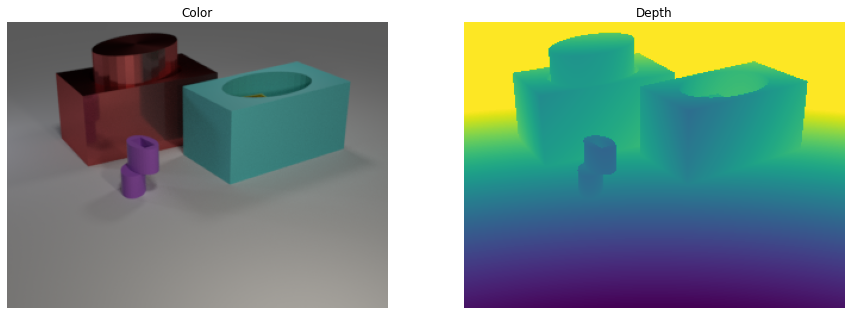

In [184]:
'''
Display the color and depth images
'''
from matplotlib import pyplot as plt

# Examine depth info
print("Depth info:")
print(f"min {depth_mat.min()}")
print(f"max {depth_mat.max()}")
print(f"mean {depth_mat.mean()}")
depth_median: float = np.median(depth_mat) 
print(f"median {depth_median}")
depth_std: float = np.std(depth_mat)
print(f"std {depth_std}")

# Scale depth values
scaled_depth: np.ndarray = np.minimum(depth_mat, depth_median+depth_std)

# Show images
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 15)
# Add color image plot
ax[0].imshow(color_mat)
ax[0].set_title('Color')
ax[0].axis('off')
# Add depth image plot
ax[1].imshow(scaled_depth)
ax[1].set_title('Depth')
ax[1].axis('off')